In [1]:
#!pip install numpy==1.19.3
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
!pip install nltk

In [5]:
!pip install sklearn

In [6]:
import re
import pandas as pd

In [7]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model


# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

C:\Users\jazmi\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
df = pd.read_csv('total_news.csv')


print(df.info())
print(df['1'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258396 entries, 0 to 258395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    258396 non-null  int64 
 1   Unnamed: 0.1  258396 non-null  int64 
 2   0             258396 non-null  object
 3   1             258396 non-null  object
 4   2             258396 non-null  object
dtypes: int64(2), object(3)
memory usage: 9.9+ MB
None
0         https://elcomercio.pe/luces/cine/star-wars-the...
1         https://elcomercio.pe/lima/sucesos/bomberos-re...
2         https://elcomercio.pe/mundo/eeuu/nueva-york-tu...
3         https://elcomercio.pe/peru/policia-decomiso-ce...
4         https://elcomercio.pe/mundo/latinoamerica/vene...
                                ...                        
258391    https://elcomercio.pe/tecnologia/ciencias/ano-...
258392    https://elcomercio.pe/opinion/columnistas/las-...
258393    https://elcomercio.pe/opinion/efemerides/192

In [9]:
forbiddenwords = re.compile('/peru/|/lima/|/tecnologia/') 

rnews = []
for n in range (len(df['1'])):
    if forbiddenwords.search(df['1'][n]):
        rnews.append(n)
        print(df['1'][n])
        
filtered_news = df.iloc[rnews]
filtered_news.to_csv("filtered_news2.csv")


https://elcomercio.pe/lima/sucesos/bomberos-registraron-170-emergencias-lima-callao-noticia-485703-noticia/
https://elcomercio.pe/peru/policia-decomiso-cerca-54-mil-kilos-droga-2017-noticia-485698-noticia/
https://elcomercio.pe/lima/policiales/molina-joven-murio-atropellado-avenida-javier-prado-noticia-485694-noticia/
https://elcomercio.pe/peru/apurimac/apurimac-huaico-obstaculiza-via-une-lambrama-chuquibambilla-noticia-485695-noticia/
https://elcomercio.pe/tecnologia/actualidad/hackers-90-contrasenas-descifrarse-segundo-noticia-485683-noticia/
https://elcomercio.pe/tecnologia/moviles/smartphones-evaluamos-moto-z2-play-motorola-noticia-485663-noticia/
https://elcomercio.pe/peru/junin/muertos-heridos-cuatro-accidentes-semana-noticia-485668-noticia/
https://elcomercio.pe/tecnologia/ciencias/superluna-aparecio-primer-dia-ano-2018-noticia-485674-noticia/
https://elcomercio.pe/lima/sucesos/conoce-primeros-bebes-nacidos-2018-noticia-485673-noticia/
https://elcomercio.pe/tecnologia/actualidad

https://elcomercio.pe/peru/fiscalia-pide-dos-anos-carcel-ex-gobernador-waldo-rios-noticia-491102-noticia/
https://elcomercio.pe/peru/ucayali/ucayali-construccion-carreteras-sido-cuestionada-noticia-491367-noticia/
https://elcomercio.pe/peru/jne-vaco-134-autoridades-regionales-municipales-2017-noticia-491182-noticia/
https://elcomercio.pe/tecnologia/ciencias/ex-presidente-obligo-enfermos-vih-brebajes-hizo-noticia-491292-noticia/
https://elcomercio.pe/peru/cusco/cusco-helicoptero-apoyara-busqueda-nathaly-salazar-noticia-491215-noticia/
https://elcomercio.pe/peru/cusco/dictan-9-meses-prision-preventiva-implicados-crimen-turista-noticia-491319-noticia/
https://elcomercio.pe/tecnologia/ciencias/balanza-mide-varia-peso-celula-viva-noticia-491358-noticia/
https://elcomercio.pe/peru/grados-buenos-aires-hubo-intencion-ocultar-noticia-491187-noticia/
https://elcomercio.pe/tecnologia/actualidad/cemento-construyo-civilizacion-moderna-destruye-noticia-491351-noticia/
https://elcomercio.pe/tecnologi

https://elcomercio.pe/lima/policiales/villa-salvador-banda-asalta-agencia-mibanco-noticia-493059-noticia/
https://elcomercio.pe/peru/otorgaran-500-becas-jovenes-victimas-terrorismo-noticia-493073-noticia/
https://elcomercio.pe/peru/pronostican-indices-radiacion-extremos-11-regiones-noticia-493079-noticia/
https://elcomercio.pe/tecnologia/actualidad/google-maps-deja-ver-claridad-mapas-noticia-492723-noticia/
https://elcomercio.pe/lima/obras/municipalidad-lima-construiran-veredas-pistas-barrio-carcamo-noticia-493078-noticia/
https://elcomercio.pe/lima/obras/lima-reconstruccion-puente-solidaridad-depende-mtc-noticia-493065-noticia/
https://elcomercio.pe/peru/cusco/cusco-clima-terreno-accidentado-complican-busqueda-turista-espanola-noticia-493062-noticia/
https://elcomercio.pe/tecnologia/ciencias/doctor-elmer-huerta-duracion-vida-futbol-noticia-492869-noticia/
https://elcomercio.pe/tecnologia/ciencias/estudios-cientificos-clonacion-historia-primera-vaca-clonada-peru-noticia-492174-noticia/

https://elcomercio.pe/lima/sucesos/villa-maria-triunfo-capturan-sujeto-mato-perro-noticia-541732-noticia/
https://elcomercio.pe/peru/ancash/enero-junio-detectado-300-casos-tuberculosis-ancash-noticia-541737-noticia/
https://elcomercio.pe/economia/peru/energia-eolica-interes-privados-legislacion-limita-noticia-541621-noticia/
https://elcomercio.pe/economia/peru/cuentas-basicas-fecha-aplicaran-cambios-sbs-noticia-541728-noticia/
https://elcomercio.pe/lima/roca-cae-acantilado-auto-deja-herido-herradura-video-noticia-541461-noticia/
https://elcomercio.pe/peru/realizan-campana-alertar-trata-personas-noticia-541714-noticia/
https://elcomercio.pe/lima/policiales/independencia-cayo-extorsionador-exigia-dinero-chofer-devolverle-auto-robado-noticia-541652-noticia/
https://elcomercio.pe/peru/arequipa/prohiben-ingreso-bolsas-plasticas-penal-arequipa-noticia-541686-noticia/
https://elcomercio.pe/economia/peru/semana-lanzan-licitacion-seguro-agricola-catastrofico-noticia-541665-noticia/
https://elco

https://elcomercio.pe/lima/obras/pueblo-libre-triple-choque-deja-heridos-av-bolivar-noticia-543921-noticia/
https://elcomercio.pe/peru/comprension-lectora-tarea-pendiente-peru-video-noticia-543914-noticia/
https://elcomercio.pe/tecnologia/ciencias/color-ausente-banderas-mundo-noticia-543922-noticia/
https://elcomercio.pe/lima/victoria-ambulante-brutalmente-agredido-pagar-cupo-nndc-noticia-543811-noticia/
https://elcomercio.pe/economia/peru/saneamiento-precaria-situacion-eps-noticia-543879-noticia/
https://elcomercio.pe/tecnologia/actualidad/virus-informatico-paraliza-fabricante-chips-apple-noticia-543871-noticia/
https://elcomercio.pe/peru/arequipa/arequipa-deslizamiento-bloquea-carretera-panamericana-sur-ocona-noticia-543864-noticia/
https://elcomercio.pe/peru/arequipa/advierten-tramo-ii-variante-uchumayo-6-avance-noticia-543284-noticia/
https://elcomercio.pe/lima/callao/callao-bloquean-av-faucett-piden-ayuda-mujer-grave-salud-nndc-noticia-543817-noticia/
https://elcomercio.pe/lima/su

https://elcomercio.pe/economia/peru/bvl-cierra-ultima-jornada-mes-baja-cae-5-agosto-noticia-nndc-552663-noticia/
https://elcomercio.pe/peru/loreto/loreto-amplian-emergencia-dos-distritos-contaminacion-rios-noticia-552670-noticia/
https://elcomercio.pe/peru/cusco/cusco-realizan-busqueda-turista-cayo-rio-vilcanota-noticia-552651-noticia/
https://elcomercio.pe/lima/sucesos/pronabec-ofrece-2-mil-becas-culminar-carrera-universitaria-noticia-requisitos-nndc-552610-noticia/
https://elcomercio.pe/lima/sucesos/essalud-alerta-web-falsa-roba-dana-computadoras-usuarios-noticia-552630-noticia/
https://elcomercio.pe/lima/centro-lima-auto-estrella-semaforo-deja-4-heridos-video-noticia-nndc-552441-noticia/
https://elcomercio.pe/peru/agosto-registro-sismos-sentidos-poblacion-ano-noticia-552537-noticia/
https://elcomercio.pe/economia/peru/precio-balon-gas-domestico-aumento-s-0-59-noticia-nndc-552536-noticia/
https://elcomercio.pe/lima/sucesos/mujer-atenderse-dolor-muela-termino-grave-herida-muslo-notici

https://elcomercio.pe/lima/policiales/san-juan-lurigancho-liberan-policia-acusado-violar-odontologa-noticia-555958-noticia/
https://elcomercio.pe/economia/peru/economia-peruana-crecera-3-3-5-segundo-semestre-preve-bcp-noticia-nndc-555966-noticia/
https://elcomercio.pe/lima/comas-seis-heridos-gravedad-choque-combi-mototaxis-noticia-nndc-555977-noticia/
https://elcomercio.pe/tecnologia/videojuegos/nintendo-presenta-switch-inspirada-pokemon-let-s-go-noticia-555969-noticia/
https://elcomercio.pe/peru/arequipa/arequipa-candidatos-gobierno-regional-enfrentaron-tenso-debate-noticia-555781-noticia/
https://elcomercio.pe/lima/policiales/alianza-lima-hinchas-enfrentan-grupo-evangelico-video-noticia-nndc-555858-noticia/
https://elcomercio.pe/lima/sucesos/alianza-lima-dijo-alberto-santana-explanada-matute-noticia-555842-noticia/
https://elcomercio.pe/tecnologia/ciencias/cientificos-investigan-anticuerpos-neutralizan-virus-sida-noticia-555946-noticia/
https://elcomercio.pe/economia/peru/grana-monte

https://elcomercio.pe/lima/senamhi-conoce-pronostico-clima-hoy-jueves-4-lima-noticia-nndc-564332-noticia/
https://elcomercio.pe/economia/peru/mef-conforma-mesa-ejecutiva-mejorar-competitividad-sector-minero-nndc-noticia-564326-noticia/
https://elcomercio.pe/tecnologia/robotica/angus-robot-revolucionar-agricultura-noticia-564061-noticia/
https://elcomercio.pe/tecnologia/ciencias/salud-estuve-dieta-18-anos-esto-aprendi-bbc-noticia-563954-noticia/
https://elcomercio.pe/peru/elecciones-2018-material-electoral-llego-pais-fotos-video-noticia-564264-noticia/
https://elcomercio.pe/economia/peru/fusiones-adquisiciones-detalles-pl-avanza-pleno-congreso-noticia-564229-noticia/
https://elcomercio.pe/economia/peru/capital-humano-peru-bajos-region-noticia-564236-noticia/
https://elcomercio.pe/peru/loreto/elecciones-2018-comenzo-reparto-material-electoral-loreto-video-noticia-nndc-564960-noticia/
https://elcomercio.pe/lima/sucesos/altercado-exteriores-clinica-encuentra-internado-alberto-fujimori-vide

https://elcomercio.pe/peru/cusco/cusco-nina-asume-cargo-gobernadora-regional-dia-fotos-noticia-566847-noticia/
https://elcomercio.pe/tecnologia/actualidad/15-predicciones-hizo-bill-gates-siglo-pasado-cumplieron-noticias-554576-noticia/
https://elcomercio.pe/lima/transporte/trenes-metro-lima-saldran-7-minutos-sabados-octubre-noticia-nndc-567435-noticia/
https://elcomercio.pe/peru/elecciones-2018-escenarios-inciertos-regiones-mineras-noticia-567508-noticia/
https://elcomercio.pe/lima/obras/jorge-munoz-recorrio-obras-juegos-panamericanos-lima-2019-noticia-567482-noticia/
https://elcomercio.pe/lima/sucesos/municipalidad-lima-pide-defensoria-mininter-intervenir-alza-peajes-noticia-567468-noticia/
https://elcomercio.pe/lima/sucesos/ninos-pueblos-indigenas-afroperuanos-conocieron-mar-primera-vez-fotos-noticia-567456-noticia/
https://elcomercio.pe/lima/sucesos/sedapal-cortara-agua-zonas-villa-maria-triunfo-lunes-noticia-nndc-567436-noticia/
https://elcomercio.pe/tecnologia/ciencias/ratones-sex

https://elcomercio.pe/peru/arequipa/trafico-ninos-arequipa-presuntos-integrantes-organizacion-criminal-noticia-574922-noticia/
https://elcomercio.pe/lima/policiales/cercado-lima-sujeto-asesino-esposa-hijo-luego-suicido-video-noticia-nndc-575125-noticia/
https://elcomercio.pe/lima/transporte/metropolitano-manana-aplicara-aumento-pasaje-s-2-85-noticia-nndc-575062-noticia/
https://elcomercio.pe/tecnologia/ecologia/latinoamerica-region-animales-perdido-medio-siglo-noticia-575139-noticia/
https://elcomercio.pe/lima/sucesos/senamhi-pronostico-clima-hoy-miercoles-7-noviembre-lima-noticia-nndc-575135-noticia/
https://elcomercio.pe/peru/la-libertad/libertad-monitores-ciudadanos-supervisan-obras-reconstruccion-noticia-575134-noticia/
https://elcomercio.pe/peru/arequipa/trafico-ninos-operaba-banda-criminal-acusada-traficar-ninos-arequipa-noticia-574853-noticia/
https://elcomercio.pe/peru/arequipa/arequipa-detienen-ex-director-general-pnp-implicado-trafico-menores-noticia-574780-noticia/
https://e

https://elcomercio.pe/lima/policiales/villa-maria-triunfo-hombre-fallecio-caer-cerro-video-noticia-nndc-578658-noticia/
https://elcomercio.pe/tecnologia/ciencias/tres-unidades-medidas-cambiaran-2019-ademas-kilo-noticia-578553-noticia/
https://elcomercio.pe/lima/seguridad/lima-6-considera-lima-segura-peatones-noticia-578601-noticia/
https://elcomercio.pe/peru/visa-estados-unidos-podra-renovar-manera-virtual-noticia-nndc-577830-noticia/
https://elcomercio.pe/lima/senamhi-pronostico-clima-lima-domingo-18-noviembre-noticia-nndc-578650-noticia/
https://elcomercio.pe/economia/peru/ceo-leadership-forums-existe-optimismo-sector-empresarial-crecer-noticia-578255-noticia/
https://elcomercio.pe/peru/la-libertad/braulio-caldas-perdio-dni-utilizan-nombre-robar-hoteles-noticia-578193-noticia/
https://elcomercio.pe/peru/noruega-dara-us-230-millones-peru-lucha-deforestacion-amazonia-noticia-578301-noticia/
https://elcomercio.pe/peru/lambayeque/desarticulan-banda-impunes-chiclayo-dedicada-usurpacion-pr

https://elcomercio.pe/peru/cusco/segunda-vuelta-jean-paul-benavente-virtual-gobernador-regional-cusco-noticia-586216-noticia/
https://elcomercio.pe/lima/sucesos/cercado-lima-registra-incendio-edificio-jiron-camana-noticia-nndc-586282-noticia/
https://elcomercio.pe/peru/loreto/iquitos-familias-asentamientos-humanos-bloquean-carretera-santo-tomas-noticia-586286-noticia/
https://elcomercio.pe/peru/segunda-vuelta-onpe-virtuales-gobernadores-resto-regiones-pais-noticia-586258-noticia/
https://elcomercio.pe/tecnologia/ciencias/amor-amistad-venganza-son-exclusivos-humanos-animales-sienten-emociones-noticia-586255-noticia/
https://elcomercio.pe/lima/policiales/san-luis-murio-hombre-baleado-frente-cebicheria-pnp-identifico-presunto-agresor-noticia-nndc-586222-noticia/
https://elcomercio.pe/lima/sucesos/inpe-presentan-libro-relatos-internos-penales-pais-noticia-586264-noticia/
https://elcomercio.pe/lima/transporte/brevetes-touring-reabre-apagon-informatico-reprogramaciones-notepases-noticia-5862

https://elcomercio.pe/tecnologia/actualidad/acariciar-bebe-prueba-medica-ayuda-reducir-dolor-noticia-588657-noticia/
https://elcomercio.pe/peru/ancash-region-conflictos-sociales-pais-noticia-588804-noticia/
https://elcomercio.pe/lima/sucesos/jefe-sucamec-renuncio-manera-irrevocable-cargo-noticia-588784-noticia/
https://elcomercio.pe/peru/loreto/loreto-comuneros-chapis-retiran-estacion-oleoducto-norperuano-noticia-588801-noticia/
https://elcomercio.pe/lima/sucesos/sedapal-suspendera-miercoles-servicio-agua-villa-maria-triunfo-noticia-nndc-588747-noticia/
https://elcomercio.pe/tecnologia/actualidad/cambio-climatico-cinco-sintomas-alarmantes-destruccion-planeta-noticia-588611-noticia/
https://elcomercio.pe/economia/peru/mef-prepublico-lineamientos-proyectos-mecanismo-app-noticia-588774-noticia/
https://elcomercio.pe/economia/peru/regulacion-laboral-factores-deberian-tomarse-cuenta-reforma-noticia-588710-noticia/
https://elcomercio.pe/economia/peru/banca-congreso-aprueba-norma-permite-libr

https://elcomercio.pe/tecnologia/whatsapp-aplicaciones-falsas-circulan-google-play-noticia-nndc-596933-noticia/
https://elcomercio.pe/tecnologia/whatsapp-trucos-nadie-entere-persona-linea-noticia-nndc-597011-noticia/
https://elcomercio.pe/lima/sucesos/aniego-sjl-rescatan-vecinos-atrapados-viviendas-fotos-noticia-597070-noticia/
https://elcomercio.pe/peru/arequipa/arequipa-sismo-4-2-grados-remece-zona-cercana-volcan-sabancaya-noticia-597086-noticia/
https://elcomercio.pe/lima/sucesos/san-juan-lurigancho-martin-vizcarra-inspecciono-zonas-afectadas-aniego-noticia-nndc-597043-noticia/
https://elcomercio.pe/peru/ampliaran-cobertura-prevencion-violencia-mujer-zonas-rurales-noticia-597076-noticia/
https://elcomercio.pe/lima/san-juan-lurigancho-irresponsabilidad-tecnica-sedapal-alcalde-noticia-nndc-597052-noticia/
https://elcomercio.pe/lima/sucesos/san-martin-porres-ladrones-disparan-vecinos-asalto-noticia-nndc-597038-noticia/
https://elcomercio.pe/tecnologia/ciencias/terraplanistas-preparan-m

https://elcomercio.pe/lima/policiales/miraflores-delincuentes-asaltan-joyeria-futbolista-adrian-zela-video-noticia-nndc-599400-noticia/
https://elcomercio.pe/peru/piura/piura-realizan-vigilia-apoyo-policia-elvis-miranda-fotos-noticia-599415-noticia/
https://elcomercio.pe/lima/sucesos/senamhi-clima-lima-pronostico-hoy-domingo-20-enero-2019-accuweather-noticia-nndc-599339-noticia/
https://elcomercio.pe/lima/sucesos/san-juan-lurigancho-reclamos-vecinos-indemnizaciones-aniego-noticia-599398-noticia/
https://elcomercio.pe/peru/piura/elvis-miranda-prision-preventiva-ano-haber-egresado-escuela-policial-nacional-noticia-599067-noticia/
https://elcomercio.pe/peru/piura/piura-policia-elvis-miranda-rojas-trasladado-penal-rio-seco-video-noticia-nndc-599192-noticia/
https://elcomercio.pe/peru/puno/comienza-fiesta-candelaria-puno-fotos-noticia-599208-noticia/
https://elcomercio.pe/tecnologia/ciencias/salud-cancer-lengua-perder-sentido-gusto-me-convirtio-mejor-chef-mexico-espana-argentina-noticia-599

https://elcomercio.pe/lima/accidentes/surco-taxista-herido-choque-provocado-conductor-fuga-noticia-nndc-606418-noticia/
https://elcomercio.pe/peru/minedu-descarta-nuevo-sistema-calificacion-letras-noticia-606398-noticia/
https://elcomercio.pe/lima/sucesos/san-martin-porres-clausuran-terminal-informal-buses-interprovinciales-marco-polo-noticia-nndc-606417-noticia/
https://elcomercio.pe/peru/moquegua/huaicos-moquegua-declaran-emergencia-distritos-60-dias-noticia-nndc-606419-noticia/
https://elcomercio.pe/peru/huaicos-desbordes-sur-han-dejado-6-muertos-noticia-606387-noticia/
https://elcomercio.pe/peru/arequipa/arequipa-sismo-magnitud-3-5-registro-provincia-caylloma-noticia-nndc-606414-noticia/
https://elcomercio.pe/peru/ica/aumento-caudal-rios-ica-pisco-enciende-alerta-roja-informa-senamhi-noticia-nndc-606412-noticia/
https://elcomercio.pe/tecnologia/google-maps-funciona-red-social-interactuar-negocios-noticia-nndc-606406-noticia/
https://elcomercio.pe/lima/comerciantes-gran-mercado-mayo

https://elcomercio.pe/lima/policiales/san-juan-miraflores-capturan-sujeto-acusado-violar-sobrina-noticia-nndc-608931-noticia/
https://elcomercio.pe/lima/sucesos/smp-empadronamiento-mototaxistas-implica-formalizacion-asegura-alcalde-noticia-nndc-608759-noticia/
https://elcomercio.pe/peru/cusco/cusco-interno-mujer-encuentran-graves-gresca-penal-varones-noticia-nndc-608957-noticia/
https://elcomercio.pe/economia/peru/sbs-amplia-plazo-agricultores-informen-siniestro-noticia-609006-noticia/
https://elcomercio.pe/lima/sucesos/pueblo-libre-mimp-pide-revisar-camaras-video-caso-joven-asesinada-hotel-noticia-608979-noticia/
https://elcomercio.pe/lima/accidentes/joven-autismo-permanece-coma-inducido-atropellado-coaster-jesus-maria-noticia-608855-noticia/
https://elcomercio.pe/peru/loreto/loreto-intervienen-sujeto-intentaba-ingresar-droga-penal-iquitos-video-noticia-608999-noticia/
https://elcomercio.pe/economia/peru/bcp-crecimiento-pbi-peruano-desacelerara-primer-trimestre-2019-noticia-nndc-60897

https://elcomercio.pe/lima/sucesos/senamhi-rio-rimac-presenta-incremento-caudal-noticia-nndc-615293-noticia/
https://elcomercio.pe/peru/arequipa/conoce-veronica-velasquez-arequipena-logro-primer-puesto-examen-coar-2019-noticia-615150-noticia/
https://elcomercio.pe/lima/transporte/transporte-distrital-metropolitano-angus-laurie-noticia-615264-noticia/
https://elcomercio.pe/tecnologia/ciencias/nasa-muestra-primera-vez-espectaculares-imagenes-ondas-choque-aviones-supersonicos-fotos-mexico-colombia-argentina-noticia-614530-noticia/
https://elcomercio.pe/tecnologia/redes-sociales/examen-admision-san-marcos-prueba-medicina-preguntas-noticia-615144-noticia/
https://elcomercio.pe/lima/callao/callao-registro-incendio-codigo-tres-empresa-pesquera-noticia-615288-noticia/
https://elcomercio.pe/tecnologia/ciencias/historia-culturas-antigueedad-le-tenian-pavor-habas-bbc-noticia-615103-noticia/
https://elcomercio.pe/tecnologia/videojuegos/captain-marvel-videojuegos-presente-poderosa-heroina-marvel-no

https://elcomercio.pe/peru/piura/piura-siete-familias-salvan-morir-deslizamiento-cerro-mancora-noticia-617655-noticia/
https://elcomercio.pe/lima/policiales/peritos-caracteristicas-vehiculo-arrastro-causo-muerte-sobrino-paolo-guerrero-noticia-nndc-617643-noticia/
https://elcomercio.pe/lima/sucesos/sedapal-cortara-agua-martes-19-marzo-zonas-san-juan-miraflores-villa-maria-triunfo-noticia-nndc-617631-noticia/
https://elcomercio.pe/lima/sucesos/ministro-carlos-bruce-pide-renuncia-directorio-sedapal-informe-aniego-san-juan-lurigancho-noticia-nndc-617635-noticia/
https://elcomercio.pe/lima/sucesos/victoria-piensan-comerciantes-operaciones-municipales-gamarra-noticia-617632-noticia/
https://elcomercio.pe/economia/peru/cofide-identifica-proyectos-financiamiento-verde-us-175-millones-noticia-nndc-617389-noticia/
https://elcomercio.pe/peru/puno/puno-comunidad-reporta-policia-bolivia-quemo-dos-camiones-peruanos-noticia-617625-noticia/
https://elcomercio.pe/lima/obras/hospicio-bartolome-manrique-

https://elcomercio.pe/peru/presidente-fuerabamba-hermanos-chavez-decian-cerraramos-via-noticia-623660-noticia/
https://elcomercio.pe/economia/peru/mtpe-educacion-dual-sera-incluido-politica-nacional-alianza-pacifico-nestle-suiza-noticia-623602-noticia/
https://elcomercio.pe/economia/peru/imec-economia-habria-crecido-2-1-impulso-agricultura-demanda-interna-noticia-623568-noticia/
https://elcomercio.pe/tecnologia/ciencias/dia-hospital-virreinato-peru-noticia-623414-noticia/
https://elcomercio.pe/deporte-total/running/tecnologia/running-vendaje-neuromuscular-ayuda-runner-noticia-623292-noticia/
https://elcomercio.pe/peru/curriculo-enfoque-genero-genero-controversia-informe-noticia-505106-noticia/
https://elcomercio.pe/peru/enfoque-genero-razones-argumentos-corte-suprema-favor-curriculo-escolar-noticia-ecpm-623465-noticia/
https://elcomercio.pe/tecnologia/moviles/apple-iphone-11-tendria-tres-camaras-posteriores-flash-led-noticia-623420-noticia/
https://elcomercio.pe/tecnologia/ciencias/pai

https://elcomercio.pe/economia/peru/mef-peru-sera-pais-desarrollado-crece-5-20-30-anos-noticia-626853-noticia/
https://elcomercio.pe/lima/policiales/cercado-lima-joven-herida-acuchillada-ex-pareja-noticia-nndc-626719-noticia/
https://elcomercio.pe/lima/sucesos/olivos-ministerio-mujer-implemento-cem-comisaria-sol-oro-feminicidio-estafanie-flores-mendoza-jose-luis-falcon-gutierrez-noticia-nndc-626776-noticia/
https://elcomercio.pe/tecnologia/actualidad/microsoft-confirmo-ataque-cibernetico-correos-outlook-tres-meses-noticia-626838-noticia/
https://elcomercio.pe/peru/arequipa/arequipa-capturan-ex-alcalde-camana-sentenciado-ocho-anos-carcel-noticia-626836-noticia/
https://elcomercio.pe/lima/transporte/protransporte-hoy-inicia-venta-tarjetas-cobro-integrado-metropolitano-corredor-azul-municipalidad-lima-pass-noticia-626758-noticia/
https://elcomercio.pe/lima/sucesos/alianza-lima-vs-universitario-2-mil-policias-daran-seguridad-clasico-futbol-peruano-noticia-626537-noticia/
https://elcomercio

https://elcomercio.pe/economia/peru/asei-precios-viviendas-departamentos-seguira-alza-menores-tasas-interes-creditos-hipotecarios-noticia-633109-noticia/
https://elcomercio.pe/peru/la-libertad/libertad-sicarios-matan-balazos-mujer-dejan-grave-bebe-3-anos-noticia-633122-noticia/
https://elcomercio.pe/tecnologia/actualidad/nino-afgano-conmueve-mundo-alegria-recibir-pierna-ortopedica-noticia-633112-noticia/
https://elcomercio.pe/lima/sucesos/miraflores-habilitara-mil-estacionamientos-vehiculos-micromovilidad-noticia-ecpm-633096-noticia/
https://elcomercio.pe/economia/peru/osiptel-operadoras-moviles-caidas-telecomunicaciones-aumentaron-96-2018-13-419-casos-noticia-nndc-633098-noticia/
https://elcomercio.pe/tecnologia/ciencias/descubren-pariente-tiranosaurio-rex-metro-altura-noticia-633081-noticia/
https://elcomercio.pe/tecnologia/twitter-permite-anadir-gifs-retuits-comentarios-video-noticia-nndc-633097-noticia/
https://elcomercio.pe/peru/loreto/loreto-declaran-emergencia-ambiental-villa-tr

https://elcomercio.pe/lima/accidentes/cercado-lima-bomberos-atienden-corto-circuito-galeria-jiron-cusco-video-noticia-nndc-635688-noticia/
https://elcomercio.pe/tecnologia/ciencias/primera-vez-siamesas-logran-sobrevivir-operacion-separacion-mexico-colombia-argentina-noticia-635464-noticia/
https://elcomercio.pe/lima/alberto-beingolea-pide-cesar-cobro-peajes-linea-amarilla-rutas-lima-noticia-nndc-635595-noticia/
https://elcomercio.pe/tecnologia/videojuegos/cinco-mejores-videojuegos-iphone-kotaku-videos-precios-fechas-datos-noticia-635669-noticia/
https://elcomercio.pe/tecnologia/ciencias/animales-koala-funcionalmente-extinto-australia-ong-akf-noticia-nndc-635680-noticia/
https://elcomercio.pe/lima/banco-nacion-denuncian-ex-funcionario-robo-sistematico-29-millones-nndc-noticia-635453-noticia/
https://elcomercio.pe/economia/peru/ccl-clase-media-crecio-4-5-alcanza-14-4-millones-peruanos-noticia-nndc-635551-noticia/
https://elcomercio.pe/lima/san-martin-porres-sedapal-controla-aniego-dejo-v

https://elcomercio.pe/tecnologia/ciencias/arqueologia-caja-herramientas-antigua-humanidad-fotos-noticia-641521-noticia/
https://elcomercio.pe/lima/sucesos/chaclacayo-hombre-murio-caerle-arbol-noticia-nndc-641839-noticia/
https://elcomercio.pe/lima/sucesos/incendio-malvinas-hay-justicia-pais-noticia-642652-noticia/
https://elcomercio.pe/peru/loreto/loreto-denuncian-derrame-petroleo-consecuencia-sismo-noticia-642645-noticia/
https://elcomercio.pe/tecnologia/ciencias/tienes-estres-perro-verse-afectado-animo-mexico-colombia-argentina-noticia-642514-noticia/
https://elcomercio.pe/peru/venezuela-peru-solicitara-visa-venezolanos-15-junio-informa-prensa-internacional-fotos-noticia-nndc-642622-noticia/
https://elcomercio.pe/lima/callao/callao-inauguran-centro-emergencia-mujer-bellavista-casos-violencia-familiar-sexual-noticia-nndc-642630-noticia/
https://elcomercio.pe/peru/piura/piura-piden-declarar-emergencia-aumento-casos-guillain-barre-noticia-ecpm-642626-noticia/
https://elcomercio.pe/tecno

https://elcomercio.pe/lima/policiales/mininter-lanza-concurso-califiquen-atencion-comisarias-noticia-644622-noticia/
https://elcomercio.pe/lima/sucesos/malecon-costa-verde-desmorona-44-dias-lima-2019-fotos-noticia-ecpm-644296-noticia/
https://elcomercio.pe/tecnologia/ciencias/misteriosa-masa-metalica-cientificos-hallaron-enterrada-luna-mexico-colombia-argentina-noticia-644431-noticia/
https://elcomercio.pe/peru/la-libertad/libertad-teniente-gobernadora-integraba-mafia-dedicada-trafico-tierras-noticia-644628-noticia/
https://elcomercio.pe/lima/sucesos/rimac-instalan-red-wifi-gratuito-alameda-descalzos-ocho-parques-distrito-noticia-nndc-644621-noticia/
https://elcomercio.pe/tecnologia/moviles/huawei-probando-sistema-operativo-arkos-millon-dispositivos-noticia-644146-noticia/
https://elcomercio.pe/tecnologia/redes-sociales/facebook-saca-nueva-aplicacion-pagar-usuarios-datos-study-from-facebook-estudio-research-noticia-nndc-644617-noticia/
https://elcomercio.pe/lima/sucesos/municipalidad-l

https://elcomercio.pe/lima/sucesos/sedapal-conoce-puntos-distribucion-agua-victoria-noticia-ecpm-652030-noticia/
https://elcomercio.pe/economia/peru/confiep-sector-privado-mejoraria-servicio-agua-cobertura-noticia-ecpm-651566-noticia/
https://elcomercio.pe/lima/sucesos/sedapal-corte-agua-lima-callao-puntos-abastecimiento-sera-suspension-parcial-miraflores-san-isidro-ate-rimac-surquillo-san-luis-cercado-noticia-ecpm-651280-noticia/
https://elcomercio.pe/lima/policiales/reo-fugado-prision-venezolana-planifico-secuestro-molina-noticia-ecpm-652243-noticia/
https://elcomercio.pe/lima/sucesos/san-juan-miraflores-rotura-tuberia-provoca-aniego-afecta-viviendas-nndc-noticia-652538-noticia/
https://elcomercio.pe/lima/sucesos/sedapal-corte-agua-lima-callao-13-distritos-restriccion-sera-100-noticia-ecpm-651088-noticia/
https://elcomercio.pe/peru/dia-maestro-9-docentes-peruanos-30-anos-noticia-ecpm-652893-noticia/
https://elcomercio.pe/tecnologia/ciencias/cuatro-tipos-cancer-cuya-principal-causa-ob

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




https://elcomercio.pe/lima/sucesos/la-victoria-gran-acumulacion-de-basura-en-alrededores-del-mercado-de-frutas-video-nndc-noticia/
https://elcomercio.pe/lima/sucesos/sunedu-deniega-licencia-institucional-a-universidad-peruana-las-americas-noticia/
https://elcomercio.pe/lima/verano-clima-en-lima-lima-soportara-una-temperatura-maxima-de-27c-hoy-viernes-3-de-enero-de-2020-segun-senamhi-radiacion-uv-noticia/
https://elcomercio.pe/economia/peru/entel-osiptel-confirma-multas-para-operadora-por-mas-de-s-13-millones-por-baja-calidad-en-atencion-de-reclamos-nndc-noticia/
https://elcomercio.pe/peru/tumbes-sismo-de-5-magnitud-se-registro-en-zarumilla-informo-el-igp-nndc-noticia/
https://elcomercio.pe/peru/madre-de-dios/madre-de-dios-la-guerra-desatada-por-el-control-de-la-comercializacion-de-droga-noticia/
https://elcomercio.pe/lima/personajes/susel-paredes-ya-cumpli-un-ciclo-dentro-de-la-victoria-magdalena-del-mar-gamarra-george-forsyth-noticia/
https://elcomercio.pe/lima/policiales/sjm-detiene

https://elcomercio.pe/peru/arequipa-sismo-de-magnitud-42-se-reporto-en-caraveli-informo-el-igp-nndc-noticia/
https://elcomercio.pe/tecnologia/ciencias/incendios-en-australia-la-tragedia-animal-tras-el-fuego-en-australia-noticia/
https://elcomercio.pe/lima/sucesos/musicos-venezolanos-denuncian-haber-sido-estafados-por-director-de-orquesta-peruano-video-nndc-noticia/
https://elcomercio.pe/peru/loreto-grupo-de-indigenas-intentan-tomar-base-de-andoas-frontera-energy-video-nndc-noticia/
https://elcomercio.pe/economia/peru/economia-se-mantuvo-debil-en-noviembre-noticia/
https://elcomercio.pe/lima/sucesos/malaguas-en-la-costa-verde-por-que-se-acercan-a-la-orilla-y-como-atender-una-picadura-noticia/
https://elcomercio.pe/lima/sucesos/callao-vehiculo-choco-contra-semaforo-y-quedo-ladeado-en-av-colonial-video-nndc-noticia/
https://elcomercio.pe/tecnologia/ciencias/astronomia-frb-las-misteriosas-senales-que-llegan-a-la-tierra-de-todas-partes-del-universo-y-que-intrigan-a-los-astronomos-noticia/
h

https://elcomercio.pe/peru/tumbes-sismo-de-magnitud-41-se-reporto-en-tumbes-senala-igp-nndc-noticia/
https://elcomercio.pe/lima/martin-vizcarra-respaldamos-a-george-forsyth-en-su-decision-de-poner-orden-y-erradicar-las-mafias-en-la-victoria-video-nndc-noticia/
https://elcomercio.pe/lima/sucesos/los-100-anos-de-la-victoria-la-historia-de-la-creacion-del-distrito-george-forsyth-gamarra-la-parada-noticia/
https://elcomercio.pe/peru/lambayeque-fijan-fecha-para-audiencia-contra-humberto-acuna-peralta-noticia/
https://elcomercio.pe/tecnologia/ciencias/coronavirus-lo-que-debes-conocer-sobre-los-sintomas-del-virus-que-alerta-al-mundo-como-se-transmite-coronavirus-de-wuhan-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-minsa-afirma-que-repatriacion-de-peruana-fallecida-en-estados-unidos-no-genera-riesgo-de-contagio-de-enfermedad-nndc-noticia/
https://elcomercio.pe/lima/sucesos/george-forsyth-la-victoria-ha-crecido-en-base-a-la-informalidad-noticia/
https://elcomercio.pe/tecnologia/cien

https://elcomercio.pe/economia/peru/las-bambas-cuanto-le-cuesta-a-apurimac-el-bloqueo-de-carreteras-noticia/
https://elcomercio.pe/tecnologia/ciencias/coronavirus-es-realmente-la-gastronomia-salvaje-el-origen-del-virus-noticia/
https://elcomercio.pe/tecnologia/ciencias/tecnologia-de-ultima-generacion-para-seguir-la-pista-de-posibles-infectados-en-china-noticia/
https://elcomercio.pe/tecnologia/ciencias/salud-por-que-es-importante-limpiar-las-encias-de-los-bebes-noticia/
https://elcomercio.pe/lima/policiales/comas-sujeto-golpeo-y-ataco-con-un-cuchillo-a-su-pareja-violencia-contra-la-mujer-nndc-noticia/
https://elcomercio.pe/tecnologia/ciencias/oms-el-nuevo-coronavirus-constituye-una-amenaza-muy-grave-para-el-mundo-noticia/
https://elcomercio.pe/tecnologia/ciencias/windows-7-un-nuevo-error-en-el-sistema-impide-que-usuarios-apaguen-sus-computadoras-noticia/
https://elcomercio.pe/lima/sucesos/lima-y-brena-recogen-dos-toneladas-de-residuos-solidos-en-la-avenida-tingo-maria-nndc-noticia/
htt

https://elcomercio.pe/tecnologia/ciencias/coronavirus-por-que-la-oms-pide-preparar-una-estrategia-de-contencion-agresiva-en-latinoamerica-noticia/
https://elcomercio.pe/tecnologia/actualidad/por-que-es-tan-facil-hackear-la-camara-de-vigilancia-de-un-bebe-y-como-puedes-protegerte-noticia/
https://elcomercio.pe/tecnologia/ciencias/coronavirus-cuan-cerca-estamos-de-una-vacuna-universal-contra-la-gripe-y-otras-enfermedades-respiratorias-noticia/
https://elcomercio.pe/peru/minsa-descarta-la-presencia-de-coronavirus-en-el-pais-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-en-peru-evaluan-casos-dos-sospechosos-en-hospital-guillermo-almenara-y-centro-de-salud-covid-19-essalud-noticia/
https://elcomercio.pe/lima/policiales/universitario-de-deportes-denuncio-a-27-sujetos-que-participaron-en-la-toma-frustrada-del-monumental-gremco-carlos-moreno-noticia/
https://elcomercio.pe/lima/sucesos/madre-de-nina-asesinada-en-independencia-al-comienzo-si-me-senti-culpable-pero-ahora-no-mirella-huam

https://elcomercio.pe/economia/peru/crean-grupo-de-trabajo-para-la-formulacion-de-la-politica-nacional-del-empleo-decente-nndc-noticia/
https://elcomercio.pe/lima/sucesos/san-juan-de-miraflores-mototaxi-cae-a-piscina-portatil-tras-ser-impactado-por-una-combi-video-nndc-noticia/
https://elcomercio.pe/lima/sucesos/george-forsyth-a-un-ano-del-desalojo-de-ambulantes-las-mafias-se-estan-extinguiendo-de-gamarra-entrevista-nndc-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-en-peru-deberia-empezar-a-cancelarse-actividades-multitudinarias-por-riesgo-de-contagio-covid-19-minsa-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-en-peru-vendedores-cuadruplican-el-precio-de-las-mascarillas-noticia/
https://elcomercio.pe/tecnologia/ecologia/especie-marina-potencialmente-invasora-amenaza-la-riqueza-natural-de-la-antartida-estudio-noticia/
https://elcomercio.pe/lima/policiales/ventanilla-policia-ubica-dentro-de-tanque-de-agua-a-adolescente-reportada-como-desaparecida-nndc-noticia/
https

https://elcomercio.pe/peru/cusco/coronavirus-en-peru-habilitan-uci-en-hospital-de-contingencia-de-cusco-para-pacientes-criticos-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-numero-de-contagiados-por-covid-19-sube-a-1065-nndc-estado-de-emergencia-coronavirus-noticia/
https://elcomercio.pe/economia/peru/las-afp-a-favor-de-invertir-fondos-en-pymes-para-garantizar-su-liquidez-afp-afp-integra-profuturo-afp-noticia/
https://elcomercio.pe/tecnologia/ecologia/por-que-estan-reapareciendo-los-animales-silvestres-en-las-ciudades-de-latinoamerica-covid-19-noticia/
https://elcomercio.pe/economia/peru/coronavirus-ministerio-de-trabajo-evalua-licencia-sin-goce-de-haber-que-opinan-los-especialistas-empleo-trabajo-remuneraciones-trabajo-remoto-noticia/
https://elcomercio.pe/economia/peru/coronavirus-peru-covid-19-bodegas-y-supermercados-atenderan-hasta-las-4-pm-por-orden-del-ejecutivo-nndc-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-martin-vizcarra-ofrece-pronunciamient

https://elcomercio.pe/peru/coronavirus-en-peru-regiones-plantean-al-gobierno-ampliar-estado-de-emergencia-nacional-por-el-covid-19-nnpp-noticia/
https://elcomercio.pe/peru/arequipa/arequipa-desinfectan-hospital-honorio-delgado-tras-caso-confirmado-de-coronavirus-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-padres-de-uno-de-los-bebes-que-nacieron-libres-de-covid-19-fueron-trasladados-a-la-villa-panamericana-estado-de-emergencia-essalud-nndc-noticia/
https://elcomercio.pe/peru/huanuco/huanuco-dictan-9-meses-de-prision-a-sujeto-que-violo-y-asesino-a-menor-de-14-anos-nnpp-noticia/
https://elcomercio.pe/economia/peru/coronavirus-peru-bono-380-soles-para-independientes-mtpe-demoras-en-la-web-para-el-subsidio-fueron-por-evitar-que-el-sistema-se-caiga-nndc-noticia/
https://elcomercio.pe/economia/peru/coronavirus-peru-editoriales-piden-rescate-al-ejecutivo-para-la-industria-del-libro-ante-crisis-por-covid-19-nndc-noticia/
https://elcomercio.pe/peru/apurimac/coronavirus-en-peru-m

https://elcomercio.pe/economia/peru/mef-aprueba-acto-constitutivo-de-fideicomiso-de-reactiva-peru-nndc-noticia/
https://elcomercio.pe/peru/madre-de-dios/madre-de-dios-nina-denuncio-en-una-carta-que-su-padrastro-la-violaba-noticia/
https://elcomercio.pe/lima/sucesos/cuarentena-peru-ministro-de-salud-no-se-pueden-hacer-17-mil-pruebas-moleculares-en-un-dia-porque-no-hay-tecnologia-para-procesarlas-covid-19-cuarentena-nndc-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-suspenderan-servicio-electrico-en-zonas-de-smp-informa-enel-nndc-noticia/
https://elcomercio.pe/economia/peru/mef-transfiere-s2643216-para-la-proteccion-y-desarrollo-de-hijos-de-victimas-de-feminicidio-nndc-noticia/
https://elcomercio.pe/economia/peru/produce-dispone-obligatoriedad-de-uso-de-la-casilla-electronica-para-actos-administrativos-nndc-noticia/
https://elcomercio.pe/peru/coronavirus-en-peru-municipio-de-sullana-anuncia-que-mas-de-80-trabajadores-ediles-seran-despedidos-nnpp-noticia/
https://elcomercio

https://elcomercio.pe/economia/peru/coronavirus-peru-exportaciones-de-flores-y-follaje-cayeron-67-al-sumar-us-147412-en-marzo-segun-adex-nndc-noticia/
https://elcomercio.pe/economia/peru/coronavirus-peru-mef-fondo-de-estabilizacion-fiscal-no-va-a-alcanzar-para-financiar-todas-las-medidas-contra-el-covid-19-nndc-noticia/
https://elcomercio.pe/tecnologia/ciencias/coronavirus-como-son-las-6-vacunas-contra-el-virus-que-ya-se-estan-probando-en-humanos-noticia/
https://elcomercio.pe/economia/peru/coronavirus-peru-reactiva-peru-colocacion-de-creditos-a-empresas-comenzara-entre-el-lunes-o-martes-covid-19-nndc-noticia/
https://elcomercio.pe/peru/ucayali/fabricaran-ataudes-con-madera-de-tala-ilegal-para-fallecidos-por-covid-19-en-ucayali-nnpp-noticia/
https://elcomercio.pe/economia/peru/coronavirus-peru-economia-operara-al-70-de-su-capacidad-al-final-de-primera-fase-de-reactivacion-estima-titular-del-mef-covid-19-nndc-noticia/
https://elcomercio.pe/lima/coronavirus-peru-division-pnp-del-callao-a

https://elcomercio.pe/tecnologia/ciencias/como-los-agujeros-de-gusano-podrian-permitir-los-viajes-a-traves-del-tiempo-y-el-espacio-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-defensoria-del-pueblo-alerta-que-hospitales-de-lima-estan-en-el-limite-de-admision-nndc-noticia/
https://elcomercio.pe/economia/peru/sunat-aprobo-normas-para-el-pago-de-la-deuda-tributaria-con-documentos-valorados-electronicos-nndc-noticia/
https://elcomercio.pe/lima/el-retorno-de-los-ninos-a-las-calles-una-libertad-con-condiciones-informe-noticia/
https://elcomercio.pe/tecnologia/ciencias/dia-de-la-hipertension-arterial-causas-prevencion-y-tratamiento-noticia/
https://elcomercio.pe/lima/sucesos/seis-medicos-han-renunciado-al-comite-de-expertos-del-covid-19-que-apoya-al-minsa-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-subio-a-2648-la-cifra-de-fallecidos-por-covid-19-nndc-noticia/
https://elcomercio.pe/peru/ayacucho/la-verdadera-historia-del-atentado-en-chuschi-primera-accion-viol

https://elcomercio.pe/lima/sucesos/coronavirus-peru-cinco-puntos-de-la-conferencia-de-martin-vizcarra-en-el-dia-71-del-estado-de-emergencia-covid-19-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-en-vivo-reporte-de-casos-y-muertes-al-cumplirse-71-dias-del-estado-de-emergencia-martin-vizcarra-minsa-cuarentena-noticia/
https://elcomercio.pe/economia/peru/coronavirus-peru-sunat-42-de-tramites-durante-cuarentena-fueron-de-registro-de-nuevos-contribuyentes-covid-19-nndc-noticia/
https://elcomercio.pe/economia/peru/coronavirus-peru-transfieren-s-214-millones-al-mincetur-para-atender-a-3000-peruanos-repatriados-nndc-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-martin-vizcarra-sobre-mensaje-del-dia-viernes-pido-disculpas-si-la-explicacion-no-fue-del-todo-clara-covid-19-nndc-noticia/
https://elcomercio.pe/economia/peru/bono-universal-familiar-presidente-vizcarra-daremos-recursos-adicionales-si-mas-familias-necesitan-el-subsidio-nndc-noticia/
https://elcomercio.pe/l

https://elcomercio.pe/lima/sucesos/mtc-presenta-protocolo-sanitario-que-deben-tener-los-servicios-de-taxi-formales-para-operar-fotos-nndc-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-jefe-de-indeci-informo-que-falta-repatriar-a-12-mil-peruanos-del-extranjero-covid-19-estado-de-emergencia-nndc-noticia/
https://elcomercio.pe/economia/peru/loreto-tumbes-piura-y-otros-departamentos-iniciaran-actividades-de-construccion-en-zonas-urbanas-nndc-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-jorge-munoz-anuncia-traslado-de-ambulantes-a-las-malvinas-y-parque-zonal-cahuide-cuarentena-estado-de-emergencia-covid-19-nndc-noticia/
https://elcomercio.pe/economia/peru/covid-19-empleo-un-26-de-empresas-peruanas-preve-una-disminucion-en-las-contrataciones-para-el-tercer-trimestre-manpowergroup-noticia/
https://elcomercio.pe/peru/arequipa-brigadas-de-salud-han-recogido-40-cadaveres-en-casas-en-lo-que-va-de-la-cuarentena-coronavirus-en-peru-nnpp-noticia/
https://elcomercio.pe/

https://elcomercio.pe/peru/la-libertad-fortaleceran-el-primer-nivel-de-atencion-de-pacientes-covid-19-en-siete-distritos-de-trujillo-nnpp-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-atu-lanza-aplicativo-para-resolver-tramites-que-quedaron-pendientes-antes-del-estado-de-emergencia-covid-19-nndc-noticia/
https://elcomercio.pe/economia/peru/trabajo-coronavirus-peru-como-recuperar-los-empleos-en-medio-de-la-crisis-por-el-covid-19-lima-metropolitana-arranca-peru-ministerio-de-trabajo-noticia/
https://elcomercio.pe/lima/sucesos/covid-19-en-peru-la-incertidumbre-campea-en-las-galerias-de-gamarra-noticia/
https://elcomercio.pe/lima/coronavirus-en-el-peru-lima-y-callao-registran-el-mayor-exceso-de-muertes-en-la-pandemia-noticia/
https://elcomercio.pe/lima/sucesos/miraflores-reportan-enfrentamiento-por-presunta-deuda-de-s52-mil-por-parte-de-administradores-de-franquicia-video-nndc-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-calles-aledanas-a-gamarra-parque-el-po

https://elcomercio.pe/tecnologia/e-sports/marvels-spider-man-asi-se-ve-el-juego-a-60-fotogramas-por-segundo-video-playstation-4-ps5-noticia/
https://elcomercio.pe/lima/sucesos/concesionarios-de-los-corredores-complementarios-pide-al-ejecutivo-que-otorgue-subsidio-para-garantizar-continuidad-del-servicio-nndc-noticia/
https://elcomercio.pe/tecnologia/ecologia/tigre-el-perro-que-rastrea-felinos-para-impulsar-su-conservacion-en-costa-rica-fotos-noticia/
https://elcomercio.pe/tecnologia/e-sports/director-de-god-of-war-asegura-que-los-juegos-deben-subir-de-precio-playstation-5-noticia/
https://elcomercio.pe/lima/coronavirus-peru-cuales-son-las-nuevas-medidas-sanitarias-para-el-retorno-a-centros-de-trabajo-cuarentena-estado-de-emergencia-covid-19-nndc-noticia/
https://elcomercio.pe/tecnologia/e-sports/ps5-que-podemos-esperar-de-la-playstation-5-sony-caracteristicas-precio-detalles-cuanto-costara-que-trae-novedades-noticia/
https://elcomercio.pe/tecnologia/ciencias/por-que-la-glucosa-juega-un

https://elcomercio.pe/lima/sucesos/coronavirus-peru-implementan-mas-camas-uci-en-el-hospital-de-villa-el-salvador-para-atencion-de-pacientes-covid-19-minsa-nndc-noticia/
https://elcomercio.pe/lima/sucesos/san-juan-de-lurigancho-cortan-la-luz-en-local-de-enel-cuando-estaban-en-plena-atencion-a-clientes-video-nndc-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-peru-minsa-e-indecopi-conformaran-grupo-de-trabajo-para-vigilar-calidad-de-insumos-de-salud-pilar-mazzetti-nndc-noticia/
https://elcomercio.pe/lima/sucesos/datos-coronavirus-peru-en-vivo-noticias-y-cifras-oficiales-hoy-viernes-17-de-julio-2020-dia-124-del-estado-de-emergencia-cuarentena-focalizada-ministerio-de-salud-pandemia-minsa-pilar-mazzetti-martin-vizcarra-noticia/
https://elcomercio.pe/lima/sucesos/municipalidad-de-lima-envio-adendas-al-mef-para-culminar-transferencia-del-metropolitano-a-la-atu-nndc-noticia/
https://elcomercio.pe/lima/sucesos/desde-que-hora-saldran-los-vuelos-para-evitar-aglomeraciones-en-el-aeropue

https://elcomercio.pe/peru/amazonas-envian-13-profesionales-para-atencion-de-pacientes-covid-19-en-comunidades-originarias-coronavirus-minsa-nnpp-noticia/
https://elcomercio.pe/tecnologia/e-sports/mortal-kombat-11-aftermath-boxeadores-profesionales-se-enfrentan-en-torneo-de-esports-videos-noticia/
https://elcomercio.pe/tecnologia/ciencias/covid-19-consejo-de-la-prensa-peruana-y-unicef-organizan-webinars-sobre-la-nueva-normalidad-noticia/
https://elcomercio.pe/lima/sucesos/casa-de-todos-aplican-vacunas-contra-la-influenza-y-pruebas-de-descarte-de-covid-19-a-indigentes-municipalidad-de-lima-jorge-munoz-nndc-noticia/
https://elcomercio.pe/economia/peru/suspension-perfecta-de-labores-ministerio-de-trabajo-cerca-de-1000-empresas-retiraron-su-solicitud-ante-reanudacion-de-actividades-bono-de-760-soles-noticia/
https://elcomercio.pe/economia/peru/trabajo-remoto-se-amplia-hasta-el-2021-sin-cambios-en-el-corto-plazo-se-deben-realizar-ajustes-ministerio-de-trabajo-mtpe-pedro-cateriano-noticia/
h

https://elcomercio.pe/peru/coronavirus-peru-en-vivo-cifras-oficiales-casos-y-muertos-por-covid-19-en-el-pais-hoy-jueves-13-de-agosto-dia-150-del-estado-de-emergencia-pandemia-ministerio-de-salud-minsa-pilar-mazzetti-cuarentena-focalizada-martin-vizcarra-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-en-peru-uni-y-ejercito-fabricaran-plantas-de-oxigeno-para-abastecer-a-hospitales-nndc-noticia/
https://elcomercio.pe/economia/peru/sunat-recaudacion-tributaria-cae-206-en-julio-que-proponen-los-expertos-para-recuperar-el-espacio-fiscal-perdido-mef-ncze-noticia/
https://elcomercio.pe/peru/apurimac/apurimac-allanan-viviendas-del-gobernador-regional-y-otros-funcionarios-en-investigacion-por-compra-de-ambulancias-noticia/
https://elcomercio.pe/economia/peru/metro-de-lima-mtc-comenzaria-pruebas-en-los-primeros-5-kilometros-de-la-linea-2-en-primer-trimestre-de-2021-nndc-noticia/
https://elcomercio.pe/economia/peru/banco-central-de-reserva-actividad-economica-se-habria-recuperado-en-julio

https://elcomercio.pe/lima/policiales/coronavirus-peru-cercado-de-lima-graban-a-jovenes-jugando-fulbito-en-cancha-sintetica-ubicada-en-el-ultimo-piso-de-galeria-video-estado-de-emergencia-nndc-noticia/
https://elcomercio.pe/lima/sucesos/en-barranco-hay-una-pista-que-se-pela-por-pedro-ortiz-bisso-noticia/
https://elcomercio.pe/peru/coronavirus-peru-en-vivo-cifras-oficiales-casos-muertos-y-noticias-hoy-jueves-03-de-setiembre-2020-dia-172-del-estado-de-emergencia-cuarentena-focalizada-minsa-pilar-mazzetti-martin-vizcarra-noticia/
https://elcomercio.pe/peru/tumbes/tumbes-extranjero-intervenido-con-un-millon-de-dolares-es-investigado-por-presunto-delito-de-lavado-de-activos-nnpp-noticia/
https://elcomercio.pe/economia/peru/transgenicos-amcham-prorroga-de-la-moratoria-al-ingreso-de-transgenicos-al-pais-podria-incumplir-el-tlc-con-eeuu-ncze-noticia/
https://elcomercio.pe/economia/peru/educacion-peru-minedu-sodital-para-cerrar-la-brecha-educativa-digital-se-debe-invertir-en-infraestructura-de-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
text_file = open("health_words.txt", "r", encoding="utf8")
lines = text_file.readlines()

print(len(lines))

for i in range (0,len(lines)):
    lines[i] = lines[i].replace('\n','')
    
print(lines)

text_file.close()

4443
['abceso', 'abdomen', 'abdominal', 'abdominales', 'abducción', 'abductores', 'abertura', 'aberturas', 'abortadora', 'aborto', 'abortus', 'abrasión', 'abscedens', 'absceso', 'abscesos', 'abstinencia', 'abuso', 'acalasia', 'acantamebiasis', 'acantolítica', 'acantolítico', 'acantolíticos', 'acantosis', 'acariasis', 'accidente', 'accidentes', 'acetábulo', 'acetonuria', 'ácidas', 'acidez', 'acidificantes', 'acido', 'ácido', 'ácido-básico', 'acidos', 'ácidos', 'acidosis', 'acné', 'acnés', 'acondicionador', 'acondrogénesis', 'acondroplasia', 'acreciones', 'acrodermatitis', 'acromegalia', 'acromioclavicular', 'actínica', 'actínico', 'actinomicetoma', 'actinomicosis', 'actinomicótica', 'acuático', 'acústico', 'ada', 'addisoniana', 'adenoides', 'adenomatosa', 'adenomegalia', 'adenosina', 'adenovirus', 'adictivas', 'adiestramiento', 'adiposidad', 'adiposo', 'adn', 'adrenérgicos', 'adrenocortical', 'adrenogenital', 'adrenogenitales', 'aductor', 'aeróbicas', 'aerostático', 'aeruginosa', 'afaqu

In [11]:
print(len(lines))

4443


In [12]:
noticias = []
palabras = []
for n in range (len(rnews)):
    res = re.sub('[^A-Za-zá-ú ]+', '', df["0"][rnews[n]]).split(' ')
    for i in res:
        if i in lines:
            palabras.append(i)
            noticias.append(rnews[n])
            break
        

In [13]:
print(len(noticias))

12694


In [14]:
textfile = open("palabras.txt", "w")
for element in palabras:
    textfile.write(element + "\n")
textfile.close()

In [15]:
clasified_news = df.iloc[noticias]
print(clasified_news)
clasified_news.to_csv("clasified_news2.csv")

        Unnamed: 0  Unnamed: 0.1  \
17              17            17   
25              25            25   
69              69            69   
129            129             1   
132            132             4   
...            ...           ...   
258321      258321           114   
258324      258324           117   
258327      258327           120   
258330      258330           123   
258339      258339           132   

                                                        0  \
17      Muertos y varios heridos en cuatro accidentes ...   
25      Costa Verde: cuádruple choque se registró esta...   
69      Resumen 2017: La salud en el año que se fue, p...   
129     Pasamayo: Fiscalía abrió investigación por acc...   
132     Tragedia en Pasamayo: sube a 48 la cifra de mu...   
...                                                   ...   
258321  EsSalud Cusco llevó cerca de un millón de medi...   
258324  Radiografía de un disparo: la foto que resume ...   
258327  La OMS val

In [16]:
list_idx = clasified_news['Unnamed: 0'].tolist()
print(list_idx)

[17, 25, 69, 129, 132, 174, 200, 207, 241, 285, 288, 289, 291, 298, 307, 349, 404, 414, 434, 438, 445, 448, 479, 488, 495, 498, 499, 517, 530, 535, 564, 567, 578, 581, 594, 600, 609, 613, 614, 617, 624, 657, 659, 683, 710, 713, 719, 744, 746, 748, 765, 775, 799, 803, 817, 835, 837, 850, 877, 878, 880, 881, 883, 887, 937, 961, 1015, 1021, 1022, 1027, 1028, 1031, 1032, 1056, 1065, 1076, 1078, 1107, 1108, 1122, 1138, 1145, 1170, 1182, 1198, 1212, 1299, 1311, 1399, 1426, 1427, 1439, 1455, 1471, 1514, 1518, 1520, 1550, 1563, 1585, 1616, 1633, 1641, 1652, 1663, 1708, 1734, 1751, 1782, 1812, 1822, 1828, 1829, 1860, 1891, 1903, 1908, 1947, 1985, 2062, 2148, 2153, 2160, 2188, 2193, 2219, 2231, 2284, 2335, 2355, 2358, 2370, 2412, 2477, 2486, 2599, 2608, 2609, 2612, 2666, 2676, 2689, 2694, 2700, 2712, 2714, 2788, 2789, 2796, 2799, 2820, 2903, 2959, 2962, 3014, 3039, 3093, 3115, 3145, 3188, 3228, 3244, 3257, 3284, 3285, 3299, 3309, 3390, 3396, 3400, 3415, 3446, 3468, 3504, 3508, 3513, 3563, 3572, 

In [17]:
df['health'] = '1'
print(df)
df.health=df.health.where(df['Unnamed: 0'].isin(list_idx),'0')

df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df = df.rename(columns = {'0': 'heading','2': 'date', '1': 'url'}, inplace = False)

print(df)
df.to_csv("train2.csv")

2021-06-27 17:33:15,983 : INFO : Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


        Unnamed: 0  Unnamed: 0.1  \
0                0             0   
1                1             1   
2                2             2   
3                3             3   
4                4             4   
...            ...           ...   
258391      258391           184   
258392      258392           185   
258393      258393           186   
258394      258394           187   
258395      258395           188   

                                                        0  \
0       "Star Wars: The Last Jedi" ya recaudó más de U...   
1       Bomberos registraron más de 170 emergencias en...   
2       Nueva York tuvo la menor tasa de homicidios de...   
3       Policía decomisó cerca de 54 mil kilos de drog...   
4       Nicolás Maduro aumenta en 40% el salario mínim...   
...                                                   ...   
258391  Por qué el año no termina realmente a la media...   
258392           Las fuerzas del mercado, por Iván Alonso   
258393            

2021-06-27 17:33:15,983 : INFO : NumExpr defaulting to 8 threads.


                                                  heading  \
0       "Star Wars: The Last Jedi" ya recaudó más de U...   
1       Bomberos registraron más de 170 emergencias en...   
2       Nueva York tuvo la menor tasa de homicidios de...   
3       Policía decomisó cerca de 54 mil kilos de drog...   
4       Nicolás Maduro aumenta en 40% el salario mínim...   
...                                                   ...   
258391  Por qué el año no termina realmente a la media...   
258392           Las fuerzas del mercado, por Iván Alonso   
258393                                  1921: Año difícil   
258394  “Cobra Kai” temporada 3 ya está disponible en ...   
258395  Apple desarrolla un teclado dinámico para MacB...   

                                                      url        date health  
0       https://elcomercio.pe/luces/cine/star-wars-the...  2018-01-01      0  
1       https://elcomercio.pe/lima/sucesos/bomberos-re...  2018-01-01      0  
2       https://elcomercio.pe/

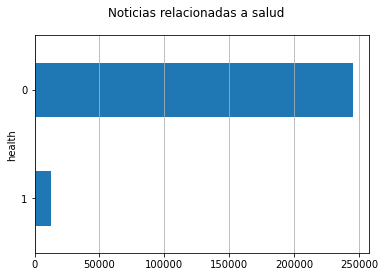

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots()
fig.suptitle("Noticias relacionadas a salud", fontsize=12)
df["health"].reset_index().groupby("health").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [19]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [20]:
!pip install nltk
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jazmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jazmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
lst_stopwords = nltk.corpus.stopwords.words("spanish")
lst_stopwords


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:

df["text_clean"] = df["heading"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df.head()

In [ ]:
df = df[['heading', 'url', 'date', 'text_clean', 'health']]
print(df.info())

In [ ]:
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.8
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print(df_train.iloc[0])
print("TEST size:", len(df_test))

W2V

In [ ]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10
import gensim

In [ ]:
%%time
documents = [_text.split() for _text in df_train.text_clean] 
print(len(documents))

In [ ]:
import gensim

# Load pre-trained Word2Vec model.
w2v_model = gensim.models.Word2Vec.load(",model.w2v")

In [ ]:
#words = w2v_model.wv.vocab.keys()
words  = w2v_model.wv.index_to_key
vocab_size = len(words)
print("Vocab size", vocab_size)

In [ ]:
w2v_model.wv.most_similar("accidente")

In [ ]:
w2v_model.wv.most_similar("muerto")

In [ ]:
w2v_model.wv.most_similar("médico")

In [ ]:
w2v_model.wv.most_similar("cáncer")

In [ ]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text_clean)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

In [ ]:

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 10
BATCH_SIZE = 1024



In [ ]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text_clean), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text_clean), maxlen=SEQUENCE_LENGTH)


In [ ]:
labels = df_train.health.unique().tolist()
labels

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_train.health.tolist())

y_train = encoder.transform(df_train.health.tolist())
y_test = encoder.transform(df_test.health.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

In [ ]:
y_train[:10]

In [ ]:
from keras.models import load_model


model = load_model('model.h5')

In [ ]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
predict("Cáncer de pulmón aumenta en el peru")

In [ ]:
from keras.models import load_model

model = load_model('model.h5')

In [ ]:
def decode_sentiment(score, include_neutral=True):
    if score < 0.5 :
        print("NEGATIVE") 
    else: 
        print("POSITIVE")

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
import time
from keras.preprocessing.sequence import pad_sequences
predict("Cáncer de pulmón aumenta en el peru")